In [1]:
#import the libraries

import pandas as pd
import numpy as np
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from wordcloud import WordCloud
from itertools import chain
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit


from nltk.corpus import stopwords

from sklearn.metrics import roc_auc_score
from sklearn.metrics import (precision_score,recall_score)

import yfinance as yf

import nltk

wn = nltk.WordNetLemmatizer()

In [2]:
#load the dataset

tweet_list = pd.read_csv('bitcoin4.csv')
tweet_list

C:\Users\rahil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339172,redirt bot,NaN,NaN,2021-07-21 17:38:47,79.0,46.0,34.0,False,2022-02-14 20:29:36,https://t.co/q3XA8T0O2s continues to add almos...,"['crypto', 'defi', 'BTC', 'ETH', 'TRX']",IFTTT,False
2339173,CrossCoin.co,NaN,https://t.co/S1j1LOZSuP finds cross-border arb...,2018-08-30 16:12:38,92.0,1.0,0.0,False,2022-02-14 20:29:32,The largest cross-border arbitrage seen by @Cr...,['BTC'],CrossCoinCo,False
2339174,CrossCoin.co,NaN,https://t.co/S1j1LOZSuP finds cross-border arb...,2018-08-30 16:12:38,92.0,1.0,0.0,False,2022-02-14 20:29:31,The largest exchange premiums &amp; discounts ...,"['BTC', 'XRP']",CrossCoinCo,False
2339175,The_Crypto_Price_bot🤖,India,This is a bot that tweets prices of crypto cur...,2020-08-19 00:42:42,226.0,1.0,280.0,False,2022-02-14 20:29:21,#Crypto #Cryptocurrency #BTC #ETH #Solana #ADA...,"['Crypto', 'Cryptocurrency', 'BTC', 'ETH', 'So...",Crypto_Price_Bot,False


In [3]:
#keeping only the important attributes
tweet_list = tweet_list[['date','text','user_followers']]
tweet_list

,date,text,user_followers
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,8534.0
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",6769.0
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",128.0
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,625.0
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,1249.0
...,...,...,...
2339172,2022-02-14 20:29:36,https://t.co/q3XA8T0O2s continues to add almos...,79.0
2339173,2022-02-14 20:29:32,The largest cross-border arbitrage seen by @Cr...,92.0
2339174,2022-02-14 20:29:31,The largest exchange premiums &amp; discounts ...,92.0
2339175,2022-02-14 20:29:21,#Crypto #Cryptocurrency #BTC #ETH #Solana #ADA...,226.0


In [4]:
#renaming columns appropriately
tweet_list = tweet_list.rename(columns = {'date': 'Date', 'text': 'Tweet', 'user_followers':'User Followers'}, inplace = False)
tweet_list

,Date,Tweet,User Followers
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,8534.0
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",6769.0
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",128.0
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,625.0
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,1249.0
...,...,...,...
2339172,2022-02-14 20:29:36,https://t.co/q3XA8T0O2s continues to add almos...,79.0
2339173,2022-02-14 20:29:32,The largest cross-border arbitrage seen by @Cr...,92.0
2339174,2022-02-14 20:29:31,The largest exchange premiums &amp; discounts ...,92.0
2339175,2022-02-14 20:29:21,#Crypto #Cryptocurrency #BTC #ETH #Solana #ADA...,226.0


In [5]:
#drop empty rows
tweet_list = tweet_list.dropna()
tweet_list

,Date,Tweet,User Followers
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,8534.0
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",6769.0
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",128.0
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,625.0
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,1249.0
...,...,...,...
2339172,2022-02-14 20:29:36,https://t.co/q3XA8T0O2s continues to add almos...,79.0
2339173,2022-02-14 20:29:32,The largest cross-border arbitrage seen by @Cr...,92.0
2339174,2022-02-14 20:29:31,The largest exchange premiums &amp; discounts ...,92.0
2339175,2022-02-14 20:29:21,#Crypto #Cryptocurrency #BTC #ETH #Solana #ADA...,226.0


In [6]:
#checking the date format
tweet_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339114 entries, 0 to 2339176
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Date            object 
 1   Tweet           object 
 2   User Followers  float64
dtypes: float64(1), object(2)
memory usage: 71.4+ MB


Date seems to be in an 'object' form, so that's gonna be a problem

In [7]:
#finding the annoying rows with letters in the date column
annoying_list = tweet_list[tweet_list['Date'].str.contains("[a-zA-Z]").fillna(False)]
annoying_list

,Date,Tweet,User Followers
64943,"['ETH', 'BTC', 'Bitcoin']",Twitter Web App,36.0
137068,"['cryptocurrency', 'BSC', 'Bitcoin', 'Ethereum...",Twitter for Android,499.0
180575,"['YieldFarming', 'Airdrop', 'Binance', 'Bitcoi...",Twitter Web App,127.0
693194,['btc'],Twitter Web App,531.0
697397,['btc'],Twitter Web App,21.0
1067665,"['YieldFarming', 'Airdrop', 'PancakeSwap', 'Gi...",Twitter for Android,1968.0
1347699,['Bitcoin'],Twitter for iPhone,0.0
1393938,"['cryptotrading', 'crypto', 'tradingbots', 'bi...",Twitter for iPhone,0.0
1513850,"['PW', 'pythonwealth', 'Presale', 'token', 'ic...",Twitter Web App,389.0
1611481,['bitcoin'],Twitter for iPhone,20.0


In [8]:
#dropping the annoying rows
tweet_list = tweet_list.drop([64943,137068,180575,693194,697397,1067665,1347699,1393938,1513850,1611481,1811149])
tweet_list

,Date,Tweet,User Followers
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,8534.0
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",6769.0
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",128.0
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,625.0
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,1249.0
...,...,...,...
2339172,2022-02-14 20:29:36,https://t.co/q3XA8T0O2s continues to add almos...,79.0
2339173,2022-02-14 20:29:32,The largest cross-border arbitrage seen by @Cr...,92.0
2339174,2022-02-14 20:29:31,The largest exchange premiums &amp; discounts ...,92.0
2339175,2022-02-14 20:29:21,#Crypto #Cryptocurrency #BTC #ETH #Solana #ADA...,226.0


In [9]:
#set it as a date format
tweet_list['Date'] =  pd.to_datetime(tweet_list['Date'], format='%Y/%m/%d %H:%M:%S')
tweet_list

,Date,Tweet,User Followers
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,8534.0
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",6769.0
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",128.0
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,625.0
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,1249.0
...,...,...,...
2339172,2022-02-14 20:29:36,https://t.co/q3XA8T0O2s continues to add almos...,79.0
2339173,2022-02-14 20:29:32,The largest cross-border arbitrage seen by @Cr...,92.0
2339174,2022-02-14 20:29:31,The largest exchange premiums &amp; discounts ...,92.0
2339175,2022-02-14 20:29:21,#Crypto #Cryptocurrency #BTC #ETH #Solana #ADA...,226.0


In [10]:
#checking 
tweet_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339103 entries, 0 to 2339176
Data columns (total 3 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Date            datetime64[ns]
 1   Tweet           object        
 2   User Followers  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 71.4+ MB


In [11]:
#removing the time (hours,minutes and seconds) factor from the date column and just keeping the date itself
tweet_list['Date'] = pd.to_datetime(tweet_list['Date']).dt.date
tweet_list.info

<bound method DataFrame.info of                Date                                              Tweet  \
0        2021-02-10  Blue Ridge Bank shares halted by NYSE after #b...   
1        2021-02-10  😎 Today, that's this #Thursday, we will do a "...   
2        2021-02-10  Guys evening, I have read this article about B...   
3        2021-02-10  $BTC A big chance in a billion! Price: \487264...   
4        2021-02-10  This network is secured by 9 508 nodes as of t...   
...             ...                                                ...   
2339172  2022-02-14  https://t.co/q3XA8T0O2s continues to add almos...   
2339173  2022-02-14  The largest cross-border arbitrage seen by @Cr...   
2339174  2022-02-14  The largest exchange premiums &amp; discounts ...   
2339175  2022-02-14  #Crypto #Cryptocurrency #BTC #ETH #Solana #ADA...   
2339176  2022-02-14  #BTC Bullish Breakout on the 4 Hr RSI. I think...   

         User Followers  
0                8534.0  
1                6769.0  
2

In [12]:
#checking 
tweet_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339103 entries, 0 to 2339176
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Date            object 
 1   Tweet           object 
 2   User Followers  float64
dtypes: float64(1), object(2)
memory usage: 71.4+ MB


In [13]:
#once again reinstate it as a date format, as it has now become an object
tweet_list['Date'] =  pd.to_datetime(tweet_list['Date'], format='%Y/%m/%d %H:%M:%S')
tweet_list

,Date,Tweet,User Followers
0,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,8534.0
1,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...",6769.0
2,2021-02-10,"Guys evening, I have read this article about B...",128.0
3,2021-02-10,$BTC A big chance in a billion! Price: \487264...,625.0
4,2021-02-10,This network is secured by 9 508 nodes as of t...,1249.0
...,...,...,...
2339172,2022-02-14,https://t.co/q3XA8T0O2s continues to add almos...,79.0
2339173,2022-02-14,The largest cross-border arbitrage seen by @Cr...,92.0
2339174,2022-02-14,The largest exchange premiums &amp; discounts ...,92.0
2339175,2022-02-14,#Crypto #Cryptocurrency #BTC #ETH #Solana #ADA...,226.0


In [14]:
#checking again
tweet_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339103 entries, 0 to 2339176
Data columns (total 3 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Date            datetime64[ns]
 1   Tweet           object        
 2   User Followers  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 71.4+ MB


In [15]:
#setting the user followers as a float to work with 

tweet_list['User Followers'] = tweet_list['User Followers'].astype(float)
tweet_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339103 entries, 0 to 2339176
Data columns (total 3 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Date            datetime64[ns]
 1   Tweet           object        
 2   User Followers  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 71.4+ MB


In [16]:
#picking the top 5 news from each day based on the highest followers
top5_everyday = tweet_list.groupby('Date')['User Followers'].nlargest(100).reset_index()
top5_everyday.head(10)

,Date,level_1,User Followers
0,2021-02-05,20473,731739.0
1,2021-02-05,21440,270717.0
2,2021-02-05,20755,265540.0
3,2021-02-05,19972,113378.0
4,2021-02-05,21062,80629.0
5,2021-02-05,21389,78780.0
6,2021-02-05,19944,78779.0
7,2021-02-05,19975,78779.0
8,2021-02-05,20027,78779.0
9,2021-02-05,20221,78779.0


In [17]:
merging_factor = tweet_list.reset_index()
merging_factor

,index,Date,Tweet,User Followers
0,0,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,8534.0
1,1,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...",6769.0
2,2,2021-02-10,"Guys evening, I have read this article about B...",128.0
3,3,2021-02-10,$BTC A big chance in a billion! Price: \487264...,625.0
4,4,2021-02-10,This network is secured by 9 508 nodes as of t...,1249.0
...,...,...,...,...
2339098,2339172,2022-02-14,https://t.co/q3XA8T0O2s continues to add almos...,79.0
2339099,2339173,2022-02-14,The largest cross-border arbitrage seen by @Cr...,92.0
2339100,2339174,2022-02-14,The largest exchange premiums &amp; discounts ...,92.0
2339101,2339175,2022-02-14,#Crypto #Cryptocurrency #BTC #ETH #Solana #ADA...,226.0


In [18]:
merging_factor = merging_factor.rename(columns = {'index':'level_1'})
merging_factor

,level_1,Date,Tweet,User Followers
0,0,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,8534.0
1,1,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...",6769.0
2,2,2021-02-10,"Guys evening, I have read this article about B...",128.0
3,3,2021-02-10,$BTC A big chance in a billion! Price: \487264...,625.0
4,4,2021-02-10,This network is secured by 9 508 nodes as of t...,1249.0
...,...,...,...,...
2339098,2339172,2022-02-14,https://t.co/q3XA8T0O2s continues to add almos...,79.0
2339099,2339173,2022-02-14,The largest cross-border arbitrage seen by @Cr...,92.0
2339100,2339174,2022-02-14,The largest exchange premiums &amp; discounts ...,92.0
2339101,2339175,2022-02-14,#Crypto #Cryptocurrency #BTC #ETH #Solana #ADA...,226.0


In [19]:
tweet_list = top5_everyday.merge(merging_factor[['level_1','Tweet']])
tweet_list

,Date,level_1,User Followers,Tweet
0,2021-02-05,20473,731739.0,Have you seen our #Bitcoin Analytics Page? \n\...
1,2021-02-05,21440,270717.0,"Binance-Listed ""FUN"" token to tap from FreeBit..."
2,2021-02-05,20755,265540.0,It's never too late to start investing in #BTC...
3,2021-02-05,19972,113378.0,This week in #Klever:\n\n1. @kucoincom list #K...
4,2021-02-05,21062,80629.0,⚠ #Crypto Brief ⚠\n\n#Bitcoin #Ethereum #Bitco...
...,...,...,...,...
11495,2022-02-18,2284960,112851.0,"I HATE THIS #SHITCOIN SO MUCH, BUT IM 100% SUR..."
11496,2022-02-18,2285052,112851.0,"OK, YOU PIECE OF SHIT! TIME TO PUMP BACK! #BTC..."
11497,2022-02-18,2289435,112052.0,"I hope #BTC get upto $250,000"
11498,2022-02-18,2296486,111318.0,What if... 🙃 #BTC\n\n👉 https://t.co/MvOPtJyU0U...


In [20]:
#checking to see if it worked

tweet_list.head(25)

,Date,level_1,User Followers,Tweet
0,2021-02-05,20473,731739.0,Have you seen our #Bitcoin Analytics Page? \n\...
1,2021-02-05,21440,270717.0,"Binance-Listed ""FUN"" token to tap from FreeBit..."
2,2021-02-05,20755,265540.0,It's never too late to start investing in #BTC...
3,2021-02-05,19972,113378.0,This week in #Klever:\n\n1. @kucoincom list #K...
4,2021-02-05,21062,80629.0,⚠ #Crypto Brief ⚠\n\n#Bitcoin #Ethereum #Bitco...
5,2021-02-05,21389,78780.0,https://t.co/zdsqyF1dxf Surge in #Bitcoin ener...
6,2021-02-05,19944,78779.0,https://t.co/zdsqyF1dxf Altcoins soar to multi...
7,2021-02-05,19975,78779.0,https://t.co/zdsqyF1dxf #Bitcoin is not a bubb...
8,2021-02-05,20027,78779.0,https://t.co/h0XWfZiGQM Market Wrap: #Bitcoin ...
9,2021-02-05,20221,78779.0,https://t.co/zdsqyF1dxf Price analysis 2/5: BT...


In [21]:
#finally dropping unused columns

tweet_list.drop(['level_1','User Followers'],
                 axis = 1, inplace = True)

In [22]:
#removing duplicates

tweet_list.drop_duplicates(inplace = True)

tweet_list

,Date,Tweet
0,2021-02-05,Have you seen our #Bitcoin Analytics Page? \n\...
1,2021-02-05,"Binance-Listed ""FUN"" token to tap from FreeBit..."
2,2021-02-05,It's never too late to start investing in #BTC...
3,2021-02-05,This week in #Klever:\n\n1. @kucoincom list #K...
4,2021-02-05,⚠ #Crypto Brief ⚠\n\n#Bitcoin #Ethereum #Bitco...
...,...,...
11495,2022-02-18,"I HATE THIS #SHITCOIN SO MUCH, BUT IM 100% SUR..."
11496,2022-02-18,"OK, YOU PIECE OF SHIT! TIME TO PUMP BACK! #BTC..."
11497,2022-02-18,"I hope #BTC get upto $250,000"
11498,2022-02-18,What if... 🙃 #BTC\n\n👉 https://t.co/MvOPtJyU0U...


In [23]:
# create a new list where all tweets will fit in each of row per date
tweets_list = pd.DataFrame(columns=['Date','Tweet'])
tweets_list

,Date,Tweet


In [24]:
# code for altering the tweets to all fit in each row per say
indx=0
get_tweet=""
for i in range(0,len(tweet_list)-1):
    get_date=tweet_list.Date.iloc[i]
    next_date=tweet_list.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+tweet_list.Tweet.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        temp_df = pd.DataFrame([[get_date, 
                                get_tweet]], columns = ['Date','Tweet'])
        tweets_list = pd.concat([tweets_list, temp_df], axis = 0).reset_index(drop = True)
        get_tweet=" "

In [25]:
#checking
tweets_list

,Date,Tweet
0,2021-02-05,Have you seen our #Bitcoin Analytics Page? \n\...
1,2021-02-06,CME Group’s Chief #Economist Calls #Bitcoin A...
2,2021-02-07,Here are countries where Cryptocurrency tradi...
3,2021-02-08,BREAKING: Tesla bought $1.5B in #bitcoin - SE...
4,2021-02-09,"""#bitcoin is an asset,"" says @novogratz. ""I t..."
...,...,...
109,2022-02-09,"With #Bitcoin, it is possible to take an owne..."
110,2022-02-14,"promote your project with us, send a dm and s..."
111,2022-02-15,"promote your project with us, send a dm 📩\n\n..."
112,2022-02-16,"promote your project with us, send a dm and s..."


In [26]:
#ordering the dates
tweets_list = tweets_list.sort_values(by='Date',ascending = True)
tweets_list.head(10)

,Date,Tweet
0,2021-02-05,Have you seen our #Bitcoin Analytics Page? \n\...
1,2021-02-06,CME Group’s Chief #Economist Calls #Bitcoin A...
2,2021-02-07,Here are countries where Cryptocurrency tradi...
3,2021-02-08,BREAKING: Tesla bought $1.5B in #bitcoin - SE...
4,2021-02-09,"""#bitcoin is an asset,"" says @novogratz. ""I t..."
5,2021-02-10,"""It has to be part of the menu,"" says @JimCra..."
6,2021-02-13,“A currency is never supposed to be more vola...
7,2021-02-14,"1 #BTC = $49,000.\n\nGuess everyone’s buying ..."
8,2021-02-15,#Bitcoin has had a huge couple of weeks and a...
9,2021-02-18,Stablecoins saw more transaction volume than ...


## Yahoo Finance

In [27]:
#using yahoo finance to look at the data for bitcoin
yahoo_bitcoin = yf.download('BTC-USD',start = '2021-02-05', end= '2022-05-27',)
yahoo_bitcoin

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-04,37475.105469,38592.175781,36317.500000,36926.066406,36926.066406,68838074392
2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402
2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653
2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143
2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687
...,...,...,...,...,...,...
2022-05-22,29432.472656,30425.861328,29275.183594,30323.722656,30323.722656,21631532270
2022-05-23,30309.396484,30590.585938,28975.560547,29098.910156,29098.910156,31483454557
2022-05-24,29101.125000,29774.355469,28786.589844,29655.585938,29655.585938,26616506245


In [28]:
yahoo_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 477 entries, 2021-02-04 to 2022-05-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       477 non-null    float64
 1   High       477 non-null    float64
 2   Low        477 non-null    float64
 3   Close      477 non-null    float64
 4   Adj Close  477 non-null    float64
 5   Volume     477 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.1 KB


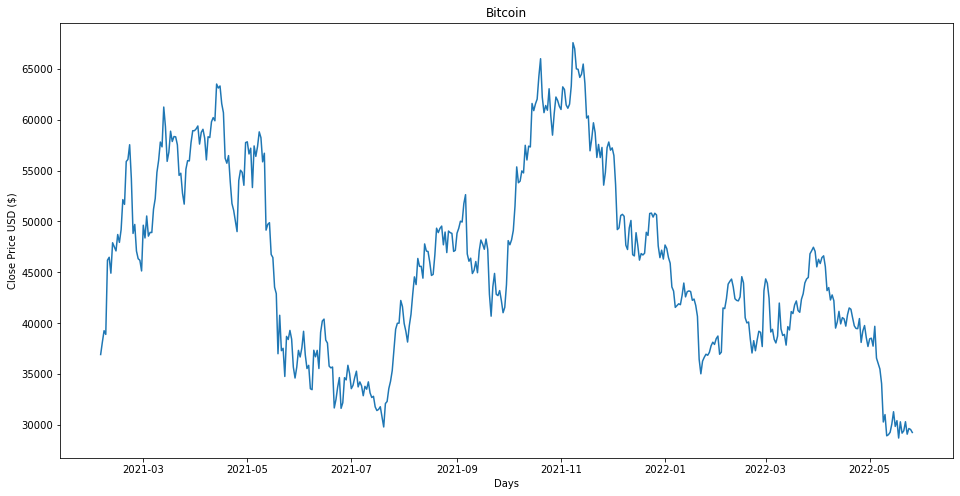

In [29]:
#visualizing the Adj Closing Price Data

plt.figure(figsize=(16,8))
plt.title('Bitcoin')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(yahoo_bitcoin['Adj Close'])
plt.show()

In [30]:
#resetting the index to get ready for merging
yahoo_bitcoin = yahoo_bitcoin.reset_index()
yahoo_bitcoin

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-04,37475.105469,38592.175781,36317.500000,36926.066406,36926.066406,68838074392
1,2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402
2,2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653
3,2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143
4,2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687
...,...,...,...,...,...,...,...
472,2022-05-22,29432.472656,30425.861328,29275.183594,30323.722656,30323.722656,21631532270
473,2022-05-23,30309.396484,30590.585938,28975.560547,29098.910156,29098.910156,31483454557
474,2022-05-24,29101.125000,29774.355469,28786.589844,29655.585938,29655.585938,26616506245
475,2022-05-25,29653.134766,30157.785156,29384.949219,29562.361328,29562.361328,27525063551


In [31]:
#merging the yahoo finance prices of bitcoin along with its tweets
tweets_list = tweets_list.merge(yahoo_bitcoin,on='Date')
tweets_list

,Date,Tweet,Open,High,Low,Close,Adj Close,Volume
0,2021-02-05,Have you seen our #Bitcoin Analytics Page? \n\...,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402
1,2021-02-06,CME Group’s Chief #Economist Calls #Bitcoin A...,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653
2,2021-02-07,Here are countries where Cryptocurrency tradi...,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143
3,2021-02-08,BREAKING: Tesla bought $1.5B in #bitcoin - SE...,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687
4,2021-02-09,"""#bitcoin is an asset,"" says @novogratz. ""I t...",46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886
...,...,...,...,...,...,...,...,...
109,2022-02-09,"With #Bitcoin, it is possible to take an owne...",44096.703125,44727.800781,43232.968750,44338.796875,44338.796875,23245887300
110,2022-02-14,"promote your project with us, send a dm and s...",42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012
111,2022-02-15,"promote your project with us, send a dm 📩\n\n...",42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
112,2022-02-16,"promote your project with us, send a dm and s...",44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657


In [32]:
#calculating the crypto trend by subtracting the current price - the previous day

tweets_list["Price Difference"] = tweets_list["Adj Close"].diff()

#since the first day won't be accounted for, we need to remove the NA value in the first row 

tweets_list.dropna(inplace = True)

tweets_list

,Date,Tweet,Open,High,Low,Close,Adj Close,Volume,Price Difference
1,2021-02-06,CME Group’s Chief #Economist Calls #Bitcoin A...,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,1121.703125
2,2021-02-07,Here are countries where Cryptocurrency tradi...,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143,-362.570312
3,2021-02-08,BREAKING: Tesla bought $1.5B in #bitcoin - SE...,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687,7293.023438
4,2021-02-09,"""#bitcoin is an asset,"" says @novogratz. ""I t...",46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886,284.640625
5,2021-02-10,"""It has to be part of the menu,"" says @JimCra...",46469.761719,47145.566406,43881.152344,44918.183594,44918.183594,87301089896,-1562.921875
...,...,...,...,...,...,...,...,...,...
109,2022-02-09,"With #Bitcoin, it is possible to take an owne...",44096.703125,44727.800781,43232.968750,44338.796875,44338.796875,23245887300,9308.546875
110,2022-02-14,"promote your project with us, send a dm and s...",42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012,-1751.878906
111,2022-02-15,"promote your project with us, send a dm 📩\n\n...",42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051,1988.285156
112,2022-02-16,"promote your project with us, send a dm and s...",44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657,-613.343750


In [33]:
#setting the labels of the dataset

RISE = 1

FALL = 0 

tweets_list["Label"] = np.where(
    tweets_list["Price Difference"] > 0, RISE, FALL
) 

tweets_list

,Date,Tweet,Open,High,Low,Close,Adj Close,Volume,Price Difference,Label
1,2021-02-06,CME Group’s Chief #Economist Calls #Bitcoin A...,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,1121.703125,1
2,2021-02-07,Here are countries where Cryptocurrency tradi...,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143,-362.570312,0
3,2021-02-08,BREAKING: Tesla bought $1.5B in #bitcoin - SE...,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687,7293.023438,1
4,2021-02-09,"""#bitcoin is an asset,"" says @novogratz. ""I t...",46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886,284.640625,1
5,2021-02-10,"""It has to be part of the menu,"" says @JimCra...",46469.761719,47145.566406,43881.152344,44918.183594,44918.183594,87301089896,-1562.921875,0
...,...,...,...,...,...,...,...,...,...,...
109,2022-02-09,"With #Bitcoin, it is possible to take an owne...",44096.703125,44727.800781,43232.968750,44338.796875,44338.796875,23245887300,9308.546875,1
110,2022-02-14,"promote your project with us, send a dm and s...",42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012,-1751.878906,0
111,2022-02-15,"promote your project with us, send a dm 📩\n\n...",42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051,1988.285156,1
112,2022-02-16,"promote your project with us, send a dm and s...",44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657,-613.343750,0


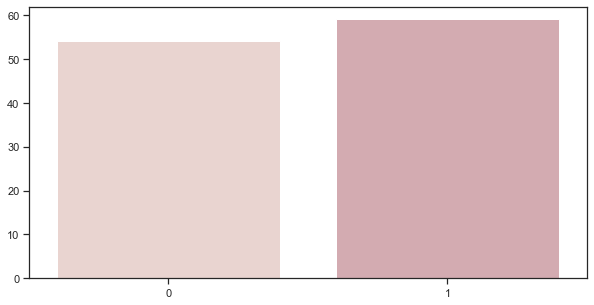

In [34]:
balance = tweets_list.Label.value_counts()
sns.set_theme(style="ticks")
plt.figure(figsize=(10,5))
sns.barplot(x=balance.index, y=balance.values, palette=sns.cubehelix_palette())
plt.show()

### Length Checking

In [35]:
tweets_list['Length'] = tweets_list['Tweet'].apply(len)
tweets_list.head()

,Date,Tweet,Open,High,Low,Close,Adj Close,Volume,Price Difference,Label,Length
1,2021-02-06,CME Group’s Chief #Economist Calls #Bitcoin A...,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,1121.703125,1,12709
2,2021-02-07,Here are countries where Cryptocurrency tradi...,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143,-362.570312,0,13216
3,2021-02-08,BREAKING: Tesla bought $1.5B in #bitcoin - SE...,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687,7293.023438,1,12606
4,2021-02-09,"""#bitcoin is an asset,"" says @novogratz. ""I t...",46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886,284.640625,1,12876
5,2021-02-10,"""It has to be part of the menu,"" says @JimCra...",46469.761719,47145.566406,43881.152344,44918.183594,44918.183594,87301089896,-1562.921875,0,13012


In [36]:
#print a sample of the tweets
tweets_list.Tweet[1]

' CME Group’s Chief #Economist Calls #Bitcoin An ‘Emerging Competitor’ to #Golden \n\nhttps://t.co/EbW6CGQVGL… https://t.co/H9wpzN80qq Hedge Fund Pushes Back on @jpmorgan\'s Claim That #ETF Would Hurt #Bitcoin\n\nhttps://t.co/t07aEovMeO\n\n@Grayscale #BTC… https://t.co/ayMdUcUh0U And we are back over $40k again! When do you think we will see a new all-time high for Bitcoin?\n\nKeep up to date wi… https://t.co/jr5k5JcOoF Regardless of what happens to the price of #Bitcoin, it’s better to have more #BTC than less, and that makes mining… https://t.co/Fi8WWMyW92 Just fielded another call from a manufacturer wanting to accept #TUSC. The list is growing. 🐘GO🚀\n\n@TUSCNetwork… https://t.co/JROXvM2VyK *BITCOIN CLIMBS ABOVE $40,000-LEVEL IN WEEKEND TRADE\n\n#BTC\n#BITCOIN https://t.co/4EgraNAT3I *Police seize $60 million of #Bitcoin! Now, where\'s the password? - https://t.co/tnfKZboe5c \n\n#BTC https://t.co/zV9aUov6Zu #BREAKING: #Bitcoin is trading at ~$40.8k/#BTC, within 3% of its all-time hi

### General Cleaning

In [37]:
#Cleaning Text (RT, Punctuation, links etc)

#Creating new dataframe and new features
clean_tweets = pd.DataFrame(tweets_list)
clean_tweets["Clean"] = clean_tweets["Tweet"]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
clean_tweets["Clean"] = clean_tweets.Clean.map(remove_rt).map(rt)
clean_tweets["Clean"] = clean_tweets.Clean.str.lower()
clean_tweets

,Date,Tweet,Open,High,Low,Close,Adj Close,Volume,Price Difference,Label,Length,Clean
1,2021-02-06,CME Group’s Chief #Economist Calls #Bitcoin A...,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,1121.703125,1,12709,cme group s chief economist calls bitcoin a...
2,2021-02-07,Here are countries where Cryptocurrency tradi...,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143,-362.570312,0,13216,here are countries where cryptocurrency tradi...
3,2021-02-08,BREAKING: Tesla bought $1.5B in #bitcoin - SE...,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687,7293.023438,1,12606,breaking tesla bought 1 5b in bitcoin se...
4,2021-02-09,"""#bitcoin is an asset,"" says @novogratz. ""I t...",46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886,284.640625,1,12876,bitcoin is an asset says i think in t...
5,2021-02-10,"""It has to be part of the menu,"" says @JimCra...",46469.761719,47145.566406,43881.152344,44918.183594,44918.183594,87301089896,-1562.921875,0,13012,it has to be part of the menu says on b...
...,...,...,...,...,...,...,...,...,...,...,...,...
109,2022-02-09,"With #Bitcoin, it is possible to take an owne...",44096.703125,44727.800781,43232.968750,44338.796875,44338.796875,23245887300,9308.546875,1,12624,with bitcoin it is possible to take an owne...
110,2022-02-14,"promote your project with us, send a dm and s...",42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012,-1751.878906,0,17590,promote your project with us send a dm and s...
111,2022-02-15,"promote your project with us, send a dm 📩\n\n...",42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051,1988.285156,1,23099,promote your project with us send a dm n...
112,2022-02-16,"promote your project with us, send a dm and s...",44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657,-613.343750,0,20678,promote your project with us send a dm and s...


In [38]:
#print a sample of the tweets
#we can now see that the tweets have become much cleaner

clean_tweets.Clean[1]

' cme group s chief  economist calls  bitcoin an  emerging competitor  to  golden       hedge fund pushes back on   s claim that  etf would hurt  bitcoin        btc    and we are back over  40k again  when do you think we will see a new all time high for bitcoin   keep up to date wi    regardless of what happens to the price of  bitcoin  it s better to have more  btc than less  and that makes mining    just fielded another call from a manufacturer wanting to accept  tusc  the list is growing   go         bitcoin climbs above  40 000 level in weekend trade   btc  bitcoin    police seize  60 million of  bitcoin  now  where s the password         btc    breaking   bitcoin is trading at   40 8k  btc  within 3  of its all time high  source      it now has a ma     breaking   bitcoin is trading at   39 5k  btc  within 10  of its all time high  amp  up  17  this week alone  source     spread the word  make youtube tutorials  shout it out on reddit  twitter  medium  bitcoin talk etc  get your 

### Removing Numbers

In [39]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
clean_tweets['Clean'] = clean_tweets['Clean'].apply(lambda x: cleaning_numbers(x))
clean_tweets.Clean[1]

' cme group s chief  economist calls  bitcoin an  emerging competitor  to  golden       hedge fund pushes back on   s claim that  etf would hurt  bitcoin        btc    and we are back over  k again  when do you think we will see a new all time high for bitcoin   keep up to date wi    regardless of what happens to the price of  bitcoin  it s better to have more  btc than less  and that makes mining    just fielded another call from a manufacturer wanting to accept  tusc  the list is growing   go         bitcoin climbs above    level in weekend trade   btc  bitcoin    police seize   million of  bitcoin  now  where s the password         btc    breaking   bitcoin is trading at    k  btc  within   of its all time high  source      it now has a ma     breaking   bitcoin is trading at    k  btc  within   of its all time high  amp  up    this week alone  source     spread the word  make youtube tutorials  shout it out on reddit  twitter  medium  bitcoin talk etc  get your friend     m igaming

### Stopwords

In [40]:
#removing the stopwords

stop = stopwords.words('english')
clean_tweets['Clean'] = clean_tweets['Clean'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
clean_tweets

,Date,Tweet,Open,High,Low,Close,Adj Close,Volume,Price Difference,Label,Length,Clean
1,2021-02-06,CME Group’s Chief #Economist Calls #Bitcoin A...,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,1121.703125,1,12709,cme group chief economist calls bitcoin emergi...
2,2021-02-07,Here are countries where Cryptocurrency tradi...,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143,-362.570312,0,13216,countries cryptocurrency trading legal illegal...
3,2021-02-08,BREAKING: Tesla bought $1.5B in #bitcoin - SE...,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687,7293.023438,1,12606,breaking tesla bought b bitcoin sec filing tsl...
4,2021-02-09,"""#bitcoin is an asset,"" says @novogratz. ""I t...",46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886,284.640625,1,12876,bitcoin asset says think future going able buy...
5,2021-02-10,"""It has to be part of the menu,"" says @JimCra...",46469.761719,47145.566406,43881.152344,44918.183594,44918.183594,87301089896,-1562.921875,0,13012,part menu says bitcoin corporations balance sh...
...,...,...,...,...,...,...,...,...,...,...,...,...
109,2022-02-09,"With #Bitcoin, it is possible to take an owne...",44096.703125,44727.800781,43232.968750,44338.796875,44338.796875,23245887300,9308.546875,1,12624,bitcoin possible take ownership stake entire i...
110,2022-02-14,"promote your project with us, send a dm and s...",42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012,-1751.878906,0,17590,promote project us send dm see values nfts nft...
111,2022-02-15,"promote your project with us, send a dm 📩\n\n...",42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051,1988.285156,1,23099,promote project us send dm nfts nftcommunity n...
112,2022-02-16,"promote your project with us, send a dm and s...",44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657,-613.343750,0,20678,promote project us send dm see values nfts nft...


In [41]:
#print a sample of the tweets again
#we can now see that the tweets have their useless words removed as well 
clean_tweets.Clean[1]

'cme group chief economist calls bitcoin emerging competitor golden hedge fund pushes back claim etf would hurt bitcoin btc back k think see new time high bitcoin keep date wi regardless happens price bitcoin better btc less makes mining fielded another call manufacturer wanting accept tusc list growing go bitcoin climbs level weekend trade btc bitcoin police seize million bitcoin password btc breaking bitcoin trading k btc within time high source breaking bitcoin trading k btc within time high amp week alone source spread word make youtube tutorials shout reddit twitter medium bitcoin talk etc get friend igaming platform integrates binance listed fun token freebitcoin bitcoin btc funfair utilitytoken bitcoin network registered million unique addresses actively sending receiving btc throughout th price data bitcoin btc pairs btcturkpro trade bitcoin cryptocurrencies professionally btcturk pr bitcoin news bitcoin climbs level weekend trade btc bitcoin bitcoinethereum com domainnameforsa

### Tokenizing

In [42]:
#tokenizing

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

clean_tweets['Clean'] = clean_tweets['Clean'].apply(lambda x: tokenize(x.lower()))
clean_tweets

,Date,Tweet,Open,High,Low,Close,Adj Close,Volume,Price Difference,Label,Length,Clean
1,2021-02-06,CME Group’s Chief #Economist Calls #Bitcoin A...,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,1121.703125,1,12709,"[cme, group, chief, economist, calls, bitcoin,..."
2,2021-02-07,Here are countries where Cryptocurrency tradi...,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143,-362.570312,0,13216,"[countries, cryptocurrency, trading, legal, il..."
3,2021-02-08,BREAKING: Tesla bought $1.5B in #bitcoin - SE...,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687,7293.023438,1,12606,"[breaking, tesla, bought, b, bitcoin, sec, fil..."
4,2021-02-09,"""#bitcoin is an asset,"" says @novogratz. ""I t...",46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886,284.640625,1,12876,"[bitcoin, asset, says, think, future, going, a..."
5,2021-02-10,"""It has to be part of the menu,"" says @JimCra...",46469.761719,47145.566406,43881.152344,44918.183594,44918.183594,87301089896,-1562.921875,0,13012,"[part, menu, says, bitcoin, corporations, bala..."
...,...,...,...,...,...,...,...,...,...,...,...,...
109,2022-02-09,"With #Bitcoin, it is possible to take an owne...",44096.703125,44727.800781,43232.968750,44338.796875,44338.796875,23245887300,9308.546875,1,12624,"[bitcoin, possible, take, ownership, stake, en..."
110,2022-02-14,"promote your project with us, send a dm and s...",42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012,-1751.878906,0,17590,"[promote, project, us, send, dm, see, values, ..."
111,2022-02-15,"promote your project with us, send a dm 📩\n\n...",42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051,1988.285156,1,23099,"[promote, project, us, send, dm, nfts, nftcomm..."
112,2022-02-16,"promote your project with us, send a dm and s...",44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657,-613.343750,0,20678,"[promote, project, us, send, dm, see, values, ..."


In [43]:
#print a sample of the tweets again
#we can now see that the tweets are in each individual group
clean_tweets.Clean[1]

['cme',
 'group',
 'chief',
 'economist',
 'calls',
 'bitcoin',
 'emerging',
 'competitor',
 'golden',
 'hedge',
 'fund',
 'pushes',
 'back',
 'claim',
 'etf',
 'would',
 'hurt',
 'bitcoin',
 'btc',
 'back',
 'k',
 'think',
 'see',
 'new',
 'time',
 'high',
 'bitcoin',
 'keep',
 'date',
 'wi',
 'regardless',
 'happens',
 'price',
 'bitcoin',
 'better',
 'btc',
 'less',
 'makes',
 'mining',
 'fielded',
 'another',
 'call',
 'manufacturer',
 'wanting',
 'accept',
 'tusc',
 'list',
 'growing',
 'go',
 'bitcoin',
 'climbs',
 'level',
 'weekend',
 'trade',
 'btc',
 'bitcoin',
 'police',
 'seize',
 'million',
 'bitcoin',
 'password',
 'btc',
 'breaking',
 'bitcoin',
 'trading',
 'k',
 'btc',
 'within',
 'time',
 'high',
 'source',
 'breaking',
 'bitcoin',
 'trading',
 'k',
 'btc',
 'within',
 'time',
 'high',
 'amp',
 'week',
 'alone',
 'source',
 'spread',
 'word',
 'make',
 'youtube',
 'tutorials',
 'shout',
 'reddit',
 'twitter',
 'medium',
 'bitcoin',
 'talk',
 'etc',
 'get',
 'friend',


In [44]:
positive_tweets = clean_tweets[clean_tweets["Label"] == 1]["Clean"]
negative_tweets = clean_tweets[clean_tweets["Label"] == 0]["Clean"]
print("No of Positive Tweets : ",len(positive_tweets))
print("No of Negative Tweets : ",len(negative_tweets))

No of Positive Tweets :  59
No of Negative Tweets :  54


In [45]:
#here we can see that it's in a list due to the dates
positive_tweets

1      [cme, group, chief, economist, calls, bitcoin,...
3      [breaking, tesla, bought, b, bitcoin, sec, fil...
4      [bitcoin, asset, says, think, future, going, a...
6      [currency, never, supposed, volatile, buy, amp...
7      [btc, guess, everyone, buying, bitcoin, valent...
9      [stablecoins, saw, transaction, volume, btc, j...
10     [bitcoin, closes, market, value, trillion, bac...
13     [bitcoin, banknotes, think, idea, crypto, cryp...
15     [weekend, bitcoin, ethereum, cooled, slightly,...
18     [investor, participation, bitcoin, soared, q, ...
20     [back, seeing, bitcoin, k, increase, price, la...
21     [getting, started, crypto, broken, five, commo...
23     [turkey, ban, crypto, currencies, banned, cryp...
26     [look, ytd, returns, btc, significantly, net, ...
32     [video, brief, history, love, hate, crypto, re...
36     [economist, steve, hanke, wants, countries, ad...
38     [bitcoin, regained, ground, day, touching, two...
39     [bitcoin, rallies, dropp

In [46]:
#now that's better!
positive_tweets = list(chain(*positive_tweets))
positive_tweets

['cme',
 'group',
 'chief',
 'economist',
 'calls',
 'bitcoin',
 'emerging',
 'competitor',
 'golden',
 'hedge',
 'fund',
 'pushes',
 'back',
 'claim',
 'etf',
 'would',
 'hurt',
 'bitcoin',
 'btc',
 'back',
 'k',
 'think',
 'see',
 'new',
 'time',
 'high',
 'bitcoin',
 'keep',
 'date',
 'wi',
 'regardless',
 'happens',
 'price',
 'bitcoin',
 'better',
 'btc',
 'less',
 'makes',
 'mining',
 'fielded',
 'another',
 'call',
 'manufacturer',
 'wanting',
 'accept',
 'tusc',
 'list',
 'growing',
 'go',
 'bitcoin',
 'climbs',
 'level',
 'weekend',
 'trade',
 'btc',
 'bitcoin',
 'police',
 'seize',
 'million',
 'bitcoin',
 'password',
 'btc',
 'breaking',
 'bitcoin',
 'trading',
 'k',
 'btc',
 'within',
 'time',
 'high',
 'source',
 'breaking',
 'bitcoin',
 'trading',
 'k',
 'btc',
 'within',
 'time',
 'high',
 'amp',
 'week',
 'alone',
 'source',
 'spread',
 'word',
 'make',
 'youtube',
 'tutorials',
 'shout',
 'reddit',
 'twitter',
 'medium',
 'bitcoin',
 'talk',
 'etc',
 'get',
 'friend',


In [47]:
#lets do the same thing for the negative tweets as well
negative_tweets = list(chain(*negative_tweets))
negative_tweets

['countries',
 'cryptocurrency',
 'trading',
 'legal',
 'illegal',
 'according',
 'checks',
 'nation',
 'bitcoin',
 'projected',
 'grow',
 'faster',
 'internet',
 'says',
 'chain',
 'analyst',
 'getting',
 'started',
 'crypto',
 'broken',
 'five',
 'common',
 'misconceptions',
 'bitcoin',
 'first',
 'cry',
 'breaking',
 'bitcoin',
 'fallen',
 'k',
 'btc',
 'k',
 'btc',
 'drop',
 'hours',
 'remember',
 'bitcoin',
 'keeping',
 'printing',
 'money',
 'inflation',
 'set',
 'bitcoin',
 'reach',
 'minimum',
 'us',
 'million',
 'know',
 'going',
 'getting',
 'second',
 'screen',
 'entertainment',
 'win',
 'big',
 'cas',
 'price',
 'data',
 'bitcoin',
 'btc',
 'pairs',
 'btcturkpro',
 'trade',
 'bitcoin',
 'cryptocurrencies',
 'professionally',
 'btcturk',
 'p',
 'circling',
 'back',
 'blockchain',
 'originally',
 'intended',
 'purpose',
 'timestamping',
 'billionaires',
 'pushing',
 'crypto',
 'mexico',
 'third',
 'richest',
 'person',
 'changes',
 'twitter',
 'bio',
 'include',
 'robinhood',

### Lemmatizing

In [48]:
#lemmatization

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

clean_tweets['Clean'] = clean_tweets['Clean'].apply(lambda x: lemmatizing(x))
clean_tweets

,Date,Tweet,Open,High,Low,Close,Adj Close,Volume,Price Difference,Label,Length,Clean
1,2021-02-06,CME Group’s Chief #Economist Calls #Bitcoin A...,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,1121.703125,1,12709,"[cme, group, chief, economist, call, bitcoin, ..."
2,2021-02-07,Here are countries where Cryptocurrency tradi...,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143,-362.570312,0,13216,"[country, cryptocurrency, trading, legal, ille..."
3,2021-02-08,BREAKING: Tesla bought $1.5B in #bitcoin - SE...,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687,7293.023438,1,12606,"[breaking, tesla, bought, b, bitcoin, sec, fil..."
4,2021-02-09,"""#bitcoin is an asset,"" says @novogratz. ""I t...",46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886,284.640625,1,12876,"[bitcoin, asset, say, think, future, going, ab..."
5,2021-02-10,"""It has to be part of the menu,"" says @JimCra...",46469.761719,47145.566406,43881.152344,44918.183594,44918.183594,87301089896,-1562.921875,0,13012,"[part, menu, say, bitcoin, corporation, balanc..."
...,...,...,...,...,...,...,...,...,...,...,...,...
109,2022-02-09,"With #Bitcoin, it is possible to take an owne...",44096.703125,44727.800781,43232.968750,44338.796875,44338.796875,23245887300,9308.546875,1,12624,"[bitcoin, possible, take, ownership, stake, en..."
110,2022-02-14,"promote your project with us, send a dm and s...",42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012,-1751.878906,0,17590,"[promote, project, u, send, dm, see, value, nf..."
111,2022-02-15,"promote your project with us, send a dm 📩\n\n...",42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051,1988.285156,1,23099,"[promote, project, u, send, dm, nfts, nftcommu..."
112,2022-02-16,"promote your project with us, send a dm and s...",44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657,-613.343750,0,20678,"[promote, project, u, send, dm, see, value, nf..."


In [49]:
#print a sample of the tweets again
#we can now see that the tweets are lemmatized
clean_tweets.Clean[1]

['cme',
 'group',
 'chief',
 'economist',
 'call',
 'bitcoin',
 'emerging',
 'competitor',
 'golden',
 'hedge',
 'fund',
 'push',
 'back',
 'claim',
 'etf',
 'would',
 'hurt',
 'bitcoin',
 'btc',
 'back',
 'k',
 'think',
 'see',
 'new',
 'time',
 'high',
 'bitcoin',
 'keep',
 'date',
 'wi',
 'regardless',
 'happens',
 'price',
 'bitcoin',
 'better',
 'btc',
 'le',
 'make',
 'mining',
 'fielded',
 'another',
 'call',
 'manufacturer',
 'wanting',
 'accept',
 'tusc',
 'list',
 'growing',
 'go',
 'bitcoin',
 'climb',
 'level',
 'weekend',
 'trade',
 'btc',
 'bitcoin',
 'police',
 'seize',
 'million',
 'bitcoin',
 'password',
 'btc',
 'breaking',
 'bitcoin',
 'trading',
 'k',
 'btc',
 'within',
 'time',
 'high',
 'source',
 'breaking',
 'bitcoin',
 'trading',
 'k',
 'btc',
 'within',
 'time',
 'high',
 'amp',
 'week',
 'alone',
 'source',
 'spread',
 'word',
 'make',
 'youtube',
 'tutorial',
 'shout',
 'reddit',
 'twitter',
 'medium',
 'bitcoin',
 'talk',
 'etc',
 'get',
 'friend',
 'igamin

In [50]:
# Convert the SMS into string from list
clean_tweets["Clean"] = clean_tweets["Clean"].agg(lambda x: ' '.join(map(str, x)))
clean_tweets

,Date,Tweet,Open,High,Low,Close,Adj Close,Volume,Price Difference,Label,Length,Clean
1,2021-02-06,CME Group’s Chief #Economist Calls #Bitcoin A...,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,1121.703125,1,12709,cme group chief economist call bitcoin emergin...
2,2021-02-07,Here are countries where Cryptocurrency tradi...,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143,-362.570312,0,13216,country cryptocurrency trading legal illegal a...
3,2021-02-08,BREAKING: Tesla bought $1.5B in #bitcoin - SE...,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687,7293.023438,1,12606,breaking tesla bought b bitcoin sec filing tsl...
4,2021-02-09,"""#bitcoin is an asset,"" says @novogratz. ""I t...",46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886,284.640625,1,12876,bitcoin asset say think future going able buy ...
5,2021-02-10,"""It has to be part of the menu,"" says @JimCra...",46469.761719,47145.566406,43881.152344,44918.183594,44918.183594,87301089896,-1562.921875,0,13012,part menu say bitcoin corporation balance shee...
...,...,...,...,...,...,...,...,...,...,...,...,...
109,2022-02-09,"With #Bitcoin, it is possible to take an owne...",44096.703125,44727.800781,43232.968750,44338.796875,44338.796875,23245887300,9308.546875,1,12624,bitcoin possible take ownership stake entire i...
110,2022-02-14,"promote your project with us, send a dm and s...",42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012,-1751.878906,0,17590,promote project u send dm see value nfts nftco...
111,2022-02-15,"promote your project with us, send a dm 📩\n\n...",42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051,1988.285156,1,23099,promote project u send dm nfts nftcommunity nf...
112,2022-02-16,"promote your project with us, send a dm and s...",44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657,-613.343750,0,20678,promote project u send dm see value nfts nftco...


In [51]:
#checking
clean_tweets["Clean"][1]

'cme group chief economist call bitcoin emerging competitor golden hedge fund push back claim etf would hurt bitcoin btc back k think see new time high bitcoin keep date wi regardless happens price bitcoin better btc le make mining fielded another call manufacturer wanting accept tusc list growing go bitcoin climb level weekend trade btc bitcoin police seize million bitcoin password btc breaking bitcoin trading k btc within time high source breaking bitcoin trading k btc within time high amp week alone source spread word make youtube tutorial shout reddit twitter medium bitcoin talk etc get friend igaming platform integrates binance listed fun token freebitcoin bitcoin btc funfair utilitytoken bitcoin network registered million unique address actively sending receiving btc throughout th price data bitcoin btc pair btcturkpro trade bitcoin cryptocurrencies professionally btcturk pr bitcoin news bitcoin climb level weekend trade btc bitcoin bitcoinethereum com domainnameforsale btc bitco

### Vectorization

#### Creating the Bag of Words

In [52]:
# Creating the Bag of Words

# Note the here we are passing already process messages (after removing punctuations and stopwords)

vectorizer = CountVectorizer()
bow_transform = vectorizer.fit(clean_tweets['Clean'])

print("20 Bag of Words (BOW) Features: \n")
print(vectorizer.get_feature_names()[20:40])

print("\nTotal number of vocab words : ",len(vectorizer.vocabulary_))

20 Bag of Words (BOW) Features: 

['abracadabra', 'abroad', 'absence', 'absolute', 'absolutely', 'absorb', 'absorbing', 'absorption', 'abstraction', 'abundance', 'abuse', 'abv', 'abyss', 'aca', 'academic', 'academy', 'acala', 'acat', 'accelerate', 'accelerated']

Total number of vocab words :  12366


In [53]:
#Taking a random text message to get its bag-of-words counts as a vector through the bow transformer:

tweet4 = clean_tweets['Clean'][3]
print(tweet4)

breaking tesla bought b bitcoin sec filing tsla btc bitcoin asset say think future going able buy btc di list country cryptocurrency trading legal illegal bitcoin btc bitcoin hit k time high tesla invests billion btc tsla ripple cto david schwartz owes sister k bitcoin bitcoin price btc skyrocket past invests billion crypto bitcoin price soaring thanks tesla buying billion worth btc bitcoin price btc skyrocket past invests billion crypto would use bitcoin buy new tesla bitcoin btc able use bitcoin buy tesla soon news come tesla purchased billion bitcoin tesla invested billion bitcoin bitcoin btc past month seen bitcoin analytics page learn bitcoin data point chain analytics breaking news revealed bought billion bitcoin filing u securi currently people looking bitcoin dogecoin platform look like th another big day bitcoin new ath broke k price going see end bitcoin trade first time ever tesla announcement btc bitcoin breaking bitcoin climb record high tesla purchase btc bitcoin tesla ex

In [54]:
#Observing its vector representation:

# fit_transform is used to learn the vocabulary dictionary and return its term-document matrix.
bow4 = bow_transform.transform([tweet4])
print(bow4)
print(bow4.shape)

  (0, 14)	3
  (0, 43)	4
  (0, 48)	2
  (0, 91)	1
  (0, 111)	2
  (0, 112)	1
  (0, 124)	1
  (0, 155)	1
  (0, 242)	1
  (0, 249)	1
  (0, 342)	2
  (0, 369)	1
  (0, 377)	1
  (0, 394)	1
  (0, 395)	1
  (0, 397)	1
  (0, 432)	1
  (0, 443)	1
  (0, 444)	2
  (0, 474)	2
  (0, 475)	1
  (0, 487)	1
  (0, 496)	1
  (0, 532)	1
  (0, 543)	2
  :	:
  (0, 11664)	1
  (0, 11696)	1
  (0, 11741)	2
  (0, 11754)	1
  (0, 11864)	2
  (0, 11866)	1
  (0, 11867)	1
  (0, 11880)	2
  (0, 11904)	2
  (0, 11955)	1
  (0, 11958)	3
  (0, 12062)	1
  (0, 12077)	1
  (0, 12090)	1
  (0, 12091)	2
  (0, 12126)	1
  (0, 12138)	6
  (0, 12142)	1
  (0, 12189)	1
  (0, 12206)	1
  (0, 12221)	1
  (0, 12233)	1
  (0, 12282)	1
  (0, 12283)	1
  (0, 12314)	1
(1, 12366)


In [55]:
#Checking words that appear more than once 

print(bow_transform.get_feature_names()[14])
print(bow_transform.get_feature_names()[43])
print(bow_transform.get_feature_names()[48])
print(bow_transform.get_feature_names()[12138])

able
accept
accepting
worth


In [56]:
tweets_bow = bow_transform.transform(clean_tweets['Clean'])

In [57]:
print('Shape of Sparse Matrix: ', tweets_bow.shape)
print('Amount of Non-Zero occurences: ', tweets_bow.nnz)

Shape of Sparse Matrix:  (113, 12366)
Amount of Non-Zero occurences:  69130


In [58]:
#trimming down the columns to only the keep the ones necessary for machine learning

clean_tweets = clean_tweets[['Clean','Label']]
df = clean_tweets
df

,Clean,Label
1,cme group chief economist call bitcoin emergin...,1
2,country cryptocurrency trading legal illegal a...,0
3,breaking tesla bought b bitcoin sec filing tsl...,1
4,bitcoin asset say think future going able buy ...,1
5,part menu say bitcoin corporation balance shee...,0
...,...,...
109,bitcoin possible take ownership stake entire i...,1
110,promote project u send dm see value nfts nftco...,0
111,promote project u send dm nfts nftcommunity nf...,1
112,promote project u send dm see value nfts nftco...,0


In [59]:
#split the data in 80/20 (following the time-series format)

x_train, x_test, y_train, y_test = \
train_test_split(tweets_bow, clean_tweets['Label'], test_size=0.2, random_state=42)

In [60]:
#for the sake of simplicity

X = tweets_bow
y = clean_tweets['Label']

### Random Forest Classifier

#### Tuning Hyperparameters

In [61]:
clf = GridSearchCV(RandomForestClassifier(random_state = 42), {
    'n_estimators': [1,5,10,20,30,40,50,60,70,80,90,100,1000],
    'criterion': ['gini', 'entropy']    
}, cv=ShuffleSplit(test_size=0.2, n_splits=1, random_state=42), return_train_score=False, scoring = 'f1_micro')
clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.01112318, 0.00524068, 0.01017547, 0.03029084, 0.04985452,
        0.06386447, 0.07954335, 0.21973515, 0.11498809, 0.15002084,
        0.16555977, 0.16969371, 1.84144974, 0.00966549, 0.0297327 ,
        0.02988648, 0.10485053, 0.10960078, 0.09428692, 0.07724142,
        0.16027379, 0.17233276, 0.14520979, 0.16975856, 0.18981862,
        2.1997962 ]),
 'std_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'mean_score_time': array([0.        , 0.00934768, 0.00990033, 0.        , 0.01032138,
        0.00608468, 0.0204196 , 0.0200088 , 0.01513481, 0.00981688,
        0.01458406, 0.01592875, 0.18297243, 0.01030159, 0.01026845,
        0.01021385, 0.00510001, 0.        , 0.00620842, 0.01223779,
        0.01975465, 0.01466346, 0.0100863 , 0.01022744, 0.01019716,
        0.11762619]),
 'std_score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        

In [62]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011123,0.0,0.000000,0.0,gini,1,"{'criterion': 'gini', 'n_estimators': 1}",0.565217,0.565217,0.0,8
1,0.005241,0.0,0.009348,0.0,gini,5,"{'criterion': 'gini', 'n_estimators': 5}",0.652174,0.652174,0.0,1
2,0.010175,0.0,0.009900,0.0,gini,10,"{'criterion': 'gini', 'n_estimators': 10}",0.608696,0.608696,0.0,5
3,0.030291,0.0,0.000000,0.0,gini,20,"{'criterion': 'gini', 'n_estimators': 20}",0.652174,0.652174,0.0,1
4,0.049855,0.0,0.010321,0.0,gini,30,"{'criterion': 'gini', 'n_estimators': 30}",0.608696,0.608696,0.0,5
5,0.063864,0.0,0.006085,0.0,gini,40,"{'criterion': 'gini', 'n_estimators': 40}",0.652174,0.652174,0.0,1
6,0.079543,0.0,0.020420,0.0,gini,50,"{'criterion': 'gini', 'n_estimators': 50}",0.565217,0.565217,0.0,8
7,0.219735,0.0,0.020009,0.0,gini,60,"{'criterion': 'gini', 'n_estimators': 60}",0.565217,0.565217,0.0,8
8,0.114988,0.0,0.015135,0.0,gini,70,"{'criterion': 'gini', 'n_estimators': 70}",0.521739,0.521739,0.0,17
9,0.150021,0.0,0.009817,0.0,gini,80,"{'criterion': 'gini', 'n_estimators': 80}",0.565217,0.565217,0.0,8


In [63]:
df[['params','mean_test_score']]

,params,mean_test_score
0,"{'criterion': 'gini', 'n_estimators': 1}",0.565217
1,"{'criterion': 'gini', 'n_estimators': 5}",0.652174
2,"{'criterion': 'gini', 'n_estimators': 10}",0.608696
3,"{'criterion': 'gini', 'n_estimators': 20}",0.652174
4,"{'criterion': 'gini', 'n_estimators': 30}",0.608696
5,"{'criterion': 'gini', 'n_estimators': 40}",0.652174
6,"{'criterion': 'gini', 'n_estimators': 50}",0.565217
7,"{'criterion': 'gini', 'n_estimators': 60}",0.565217
8,"{'criterion': 'gini', 'n_estimators': 70}",0.521739
9,"{'criterion': 'gini', 'n_estimators': 80}",0.565217


In [64]:
clf.best_params_

{'criterion': 'gini', 'n_estimators': 5}

In [65]:
clf.best_score_

0.6521739130434783

#### Running The Official Model

In [66]:
#create and train the model 

model = RandomForestClassifier(criterion='gini', n_estimators = 5, random_state = 42).fit(x_train, y_train)

In [67]:
#show the model's predictions
predictions = model.predict(x_test)
predictions

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0])

In [68]:
#checking the actual
y_test

81     0
5      0
41     1
70     1
11     0
46     1
71     1
67     0
48     0
12     0
99     1
37     0
84     0
112    0
19     0
1      1
73     1
27     0
82     0
54     1
105    0
92     0
13     1
Name: Label, dtype: int32

In [69]:
#show the model metric

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.54      0.78      0.64         9

    accuracy                           0.65        23
   macro avg       0.67      0.67      0.65        23
weighted avg       0.70      0.65      0.65        23



In [70]:
print('Accuracy of RF:', accuracy_score(y_test, model.predict(x_test)))
print('Precision:', precision_score(y_test, model.predict(x_test)))
print('Recall:', recall_score(y_test, model.predict(x_test)))
print('ROC-AUC: {}'.format(roc_auc_score(y_test, predictions)))

Accuracy of RF: 0.6521739130434783
Precision: 0.5384615384615384
Recall: 0.7777777777777778
ROC-AUC: 0.6746031746031745


### Logistic Regression

#### Tuning Hyperparameters

In [71]:
clf = GridSearchCV(LogisticRegression(random_state = 42), {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [1,2,3,4,5,6,7,8,9,10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
}, cv=ShuffleSplit(test_size=0.2, n_splits=1, random_state=42), return_train_score=False, scoring = 'f1_micro')
clf.fit(X, y)
clf.cv_results_

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selectio

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver,

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fi

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fi

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fi

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fi

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fi

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Det

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fi

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fi

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.56521739        nan 0.47826087 0.56521739
 0.60869565 0.60869565 0.56521739 0.47826087        nan        nan
        nan        nan        nan 0.60869565 0.56521739        nan
 0.56521739 0.47826087        nan        nan

{'mean_fit_time': array([0.00000000e+00, 0.00000000e+00, 2.03242302e-02, 0.00000000e+00,
        2.71049976e-01, 1.77011490e-01, 1.84008598e-01, 1.90310478e-02,
        6.55081272e-02, 8.05087090e-02, 0.00000000e+00, 0.00000000e+00,
        8.12506676e-03, 5.13553619e-04, 0.00000000e+00, 7.07566738e-02,
        6.09164238e-02, 7.97843933e-03, 6.30104542e-02, 7.06775188e-02,
        6.04605675e-03, 2.03442574e-03, 2.01659203e-02, 0.00000000e+00,
        2.63014555e-01, 1.79844141e-01, 1.79876804e-01, 2.02078819e-02,
        6.92923069e-02, 8.74056816e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.23713017e-02, 7.98392296e-02,
        6.53860569e-02, 1.53017044e-03, 7.14516640e-02, 8.77089500e-02,
        0.00000000e+00, 0.00000000e+00, 1.99580193e-02, 0.00000000e+00,
        3.58919382e-01, 1.43162966e-01, 1.76354647e-01, 2.16329098e-02,
        7.68435001e-02, 8.30953121e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.00440

In [72]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000000,0.0,0.000000,0.0,1,l1,newton-cg,"{'C': 1, 'penalty': 'l1', 'solver': 'newton-cg'}",NaN,NaN,NaN,200
1,0.000000,0.0,0.000000,0.0,1,l1,lbfgs,"{'C': 1, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,131
2,0.020324,0.0,0.000000,0.0,1,l1,liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.565217,0.565217,0.0,32
3,0.000000,0.0,0.000000,0.0,1,l1,sag,"{'C': 1, 'penalty': 'l1', 'solver': 'sag'}",NaN,NaN,NaN,132
4,0.271050,0.0,0.000000,0.0,1,l1,saga,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.478261,0.478261,0.0,81
...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.070580,0.0,0.002246,0.0,10,none,newton-cg,"{'C': 10, 'penalty': 'none', 'solver': 'newton...",0.608696,0.608696,0.0,1
196,0.064833,0.0,0.000000,0.0,10,none,lbfgs,"{'C': 10, 'penalty': 'none', 'solver': 'lbfgs'}",0.565217,0.565217,0.0,32
197,0.000000,0.0,0.000000,0.0,10,none,liblinear,"{'C': 10, 'penalty': 'none', 'solver': 'liblin...",NaN,NaN,NaN,130
198,0.070783,0.0,0.002018,0.0,10,none,sag,"{'C': 10, 'penalty': 'none', 'solver': 'sag'}",0.565217,0.565217,0.0,32


In [73]:
df[['params','mean_test_score']]

,params,mean_test_score
0,"{'C': 1, 'penalty': 'l1', 'solver': 'newton-cg'}",NaN
1,"{'C': 1, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN
2,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.565217
3,"{'C': 1, 'penalty': 'l1', 'solver': 'sag'}",NaN
4,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.478261
...,...,...
195,"{'C': 10, 'penalty': 'none', 'solver': 'newton...",0.608696
196,"{'C': 10, 'penalty': 'none', 'solver': 'lbfgs'}",0.565217
197,"{'C': 10, 'penalty': 'none', 'solver': 'liblin...",NaN
198,"{'C': 10, 'penalty': 'none', 'solver': 'sag'}",0.565217


In [74]:
clf.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [75]:
clf.best_score_

0.6086956521739131

#### Running The Official Model

In [76]:
#create and train the model 

model = LogisticRegression(penalty = 'l2' , solver = 'lbfgs', random_state = 42).fit(x_train, y_train)

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
#show the model's predictions
predictions = model.predict(x_test)
predictions

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1])

In [78]:
#checking the actual
y_test

81     0
5      0
41     1
70     1
11     0
46     1
71     1
67     0
48     0
12     0
99     1
37     0
84     0
112    0
19     0
1      1
73     1
27     0
82     0
54     1
105    0
92     0
13     1
Name: Label, dtype: int32

In [79]:
#show the model metric

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.50      0.61        14
           1       0.50      0.78      0.61         9

    accuracy                           0.61        23
   macro avg       0.64      0.64      0.61        23
weighted avg       0.67      0.61      0.61        23



In [80]:
print('Accuracy of LR:', accuracy_score(y_test, model.predict(x_test)))
print('Precision:', precision_score(y_test, model.predict(x_test)))
print('Recall:', recall_score(y_test, model.predict(x_test)))
print('ROC-AUC: {}'.format(roc_auc_score(y_test, predictions)))

Accuracy of LR: 0.6086956521739131
Precision: 0.5
Recall: 0.7777777777777778
ROC-AUC: 0.6388888888888888


### Multi Layer Perceptron

#### Tuning Hyperparameters

In [81]:
clf = GridSearchCV(MLPClassifier(random_state = 42), {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
}, cv=ShuffleSplit(test_size=0.2, n_splits=1, random_state=42), return_train_score=False, scoring='f1_micro')
clf.fit(X, y)
clf.cv_results_

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'mean_fit_time': array([ 7.0909729 , 10.66987991,  1.70758009, 19.31947184,  9.17184448,
         5.2317543 , 15.66537118, 11.29913568,  2.95537162,  7.09846187,
         8.96393037,  2.26248026]),
 'std_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'mean_score_time': array([0.0020175 , 0.        , 0.00794387, 0.        , 0.00453973,
        0.        , 0.00456548, 0.        , 0.        , 0.0080018 ,
        0.00404048, 0.00202942]),
 'std_score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'param_activation': masked_array(data=['identity', 'identity', 'identity', 'logistic',
                    'logistic', 'logistic', 'tanh', 'tanh', 'tanh', 'relu',
                    'relu', 'relu'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_solver': masked_array(data=['lbfgs', 'sgd', 'adam', 'lbfgs', 'sgd', 'adam',


In [82]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_solver,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,7.090973,0.0,0.002017,0.0,identity,lbfgs,"{'activation': 'identity', 'solver': 'lbfgs'}",0.565217,0.565217,0.0,4
1,10.669880,0.0,0.000000,0.0,identity,sgd,"{'activation': 'identity', 'solver': 'sgd'}",0.652174,0.652174,0.0,2
2,1.707580,0.0,0.007944,0.0,identity,adam,"{'activation': 'identity', 'solver': 'adam'}",0.391304,0.391304,0.0,12
3,19.319472,0.0,0.000000,0.0,logistic,lbfgs,"{'activation': 'logistic', 'solver': 'lbfgs'}",0.521739,0.521739,0.0,9
4,9.171844,0.0,0.004540,0.0,logistic,sgd,"{'activation': 'logistic', 'solver': 'sgd'}",0.521739,0.521739,0.0,9
5,5.231754,0.0,0.000000,0.0,logistic,adam,"{'activation': 'logistic', 'solver': 'adam'}",0.652174,0.652174,0.0,2
6,15.665371,0.0,0.004565,0.0,tanh,lbfgs,"{'activation': 'tanh', 'solver': 'lbfgs'}",0.521739,0.521739,0.0,9
7,11.299136,0.0,0.000000,0.0,tanh,sgd,"{'activation': 'tanh', 'solver': 'sgd'}",0.695652,0.695652,0.0,1
8,2.955372,0.0,0.000000,0.0,tanh,adam,"{'activation': 'tanh', 'solver': 'adam'}",0.565217,0.565217,0.0,4
9,7.098462,0.0,0.008002,0.0,relu,lbfgs,"{'activation': 'relu', 'solver': 'lbfgs'}",0.565217,0.565217,0.0,4


In [83]:
df[['params','mean_test_score']]

,params,mean_test_score
0,"{'activation': 'identity', 'solver': 'lbfgs'}",0.565217
1,"{'activation': 'identity', 'solver': 'sgd'}",0.652174
2,"{'activation': 'identity', 'solver': 'adam'}",0.391304
3,"{'activation': 'logistic', 'solver': 'lbfgs'}",0.521739
4,"{'activation': 'logistic', 'solver': 'sgd'}",0.521739
5,"{'activation': 'logistic', 'solver': 'adam'}",0.652174
6,"{'activation': 'tanh', 'solver': 'lbfgs'}",0.521739
7,"{'activation': 'tanh', 'solver': 'sgd'}",0.695652
8,"{'activation': 'tanh', 'solver': 'adam'}",0.565217
9,"{'activation': 'relu', 'solver': 'lbfgs'}",0.565217


In [84]:
clf.best_params_

{'activation': 'tanh', 'solver': 'sgd'}

In [85]:
clf.best_score_

0.6956521739130435

#### Running The Official Model

In [86]:
#create and train the model 

model = MLPClassifier(activation = 'tanh', solver = 'sgd', random_state = 42).fit(x_train, y_train)

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [87]:
#show the model's predictions
predictions = model.predict(x_test)
predictions

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1])

In [88]:
#checking the actual
y_test

81     0
5      0
41     1
70     1
11     0
46     1
71     1
67     0
48     0
12     0
99     1
37     0
84     0
112    0
19     0
1      1
73     1
27     0
82     0
54     1
105    0
92     0
13     1
Name: Label, dtype: int32

In [89]:
### show the model metric

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.57      0.89      0.70         9

    accuracy                           0.70        23
   macro avg       0.73      0.73      0.70        23
weighted avg       0.76      0.70      0.70        23



In [90]:
print('Accuracy of MLP:', accuracy_score(y_test, model.predict(x_test)))
print('Precision:', precision_score(y_test, model.predict(x_test)))
print('Recall:', recall_score(y_test, model.predict(x_test)))
print('ROC-AUC: {}'.format(roc_auc_score(y_test, predictions)))

Accuracy of MLP: 0.6956521739130435
Precision: 0.5714285714285714
Recall: 0.8888888888888888
ROC-AUC: 0.7301587301587301


### KNN

#### Tuning Hyperparameters

In [91]:
clf = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors': [1,3,5,7,9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [0,10,20,30,40,50,60,70,80,90,100],
}, cv=ShuffleSplit(test_size=0.2, n_splits=1, random_state=42), return_train_score=False, scoring = 'f1_micro')
clf.fit(X, y)
clf.cv_results_

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\rahil\anaconda3\

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\rahil\anaconda3\

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\rahil\anaconda3\

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\rahil\anaconda3\

{'mean_fit_time': array([0.        , 0.        , 0.        , 0.        , 0.00500298,
        0.        , 0.00202823, 0.        , 0.00305319, 0.00500464,
        0.0020473 , 0.        , 0.00100851, 0.        , 0.        ,
        0.00734019, 0.        , 0.00754189, 0.        , 0.00051689,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00804567, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00104189,
        0.        , 0.00500584, 0.00155592, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00151539, 0.00101089, 0.00209832, 0.00107288, 0.00103116,
        0.0020895 , 0.        , 0.        , 0.0020442 , 0.        ,
        0.00204253, 0.        , 0.        , 0.        , 0.00211787,
        0.00582862, 0.00273967, 0.        , 0.        , 0.00204515,
        0.        , 0.00303173, 0.00107789, 0.00681424, 0.        ,
        0.00104761, 0.00307035,

In [92]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000000,0.0,0.010454,0.0,auto,0,1,uniform,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",0.565217,0.565217,0.0,1
1,0.000000,0.0,0.008566,0.0,auto,0,1,distance,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",0.565217,0.565217,0.0,1
2,0.000000,0.0,0.005005,0.0,auto,0,3,uniform,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",0.391304,0.391304,0.0,353
3,0.000000,0.0,0.003026,0.0,auto,0,3,distance,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",0.391304,0.391304,0.0,353
4,0.005003,0.0,0.004049,0.0,auto,0,5,uniform,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",0.521739,0.521739,0.0,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0.000000,0.0,0.005288,0.0,brute,100,5,distance,"{'algorithm': 'brute', 'leaf_size': 100, 'n_ne...",0.521739,0.521739,0.0,177
436,0.000000,0.0,0.005008,0.0,brute,100,7,uniform,"{'algorithm': 'brute', 'leaf_size': 100, 'n_ne...",0.565217,0.565217,0.0,1
437,0.000000,0.0,0.006067,0.0,brute,100,7,distance,"{'algorithm': 'brute', 'leaf_size': 100, 'n_ne...",0.565217,0.565217,0.0,1
438,0.000000,0.0,0.003507,0.0,brute,100,9,uniform,"{'algorithm': 'brute', 'leaf_size': 100, 'n_ne...",0.478261,0.478261,0.0,265


In [93]:
df[['params','mean_test_score']]

,params,mean_test_score
0,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",0.565217
1,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",0.565217
2,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",0.391304
3,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",0.391304
4,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",0.521739
...,...,...
435,"{'algorithm': 'brute', 'leaf_size': 100, 'n_ne...",0.521739
436,"{'algorithm': 'brute', 'leaf_size': 100, 'n_ne...",0.565217
437,"{'algorithm': 'brute', 'leaf_size': 100, 'n_ne...",0.565217
438,"{'algorithm': 'brute', 'leaf_size': 100, 'n_ne...",0.478261


In [94]:
clf.best_params_

{'algorithm': 'auto', 'leaf_size': 0, 'n_neighbors': 1, 'weights': 'uniform'}

In [95]:
clf.best_score_

0.5652173913043478

#### Running The Official Model

In [96]:
#create and train the model 

model = KNeighborsClassifier(algorithm = 'auto', leaf_size = 0, n_neighbors = 1, weights = 'uniform').fit(x_train, y_train)

In [97]:
#show the model's predictions
predictions = model.predict(x_test)
predictions

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1])

In [98]:
#checking the actual
y_test

81     0
5      0
41     1
70     1
11     0
46     1
71     1
67     0
48     0
12     0
99     1
37     0
84     0
112    0
19     0
1      1
73     1
27     0
82     0
54     1
105    0
92     0
13     1
Name: Label, dtype: int32

In [99]:
#show the model metric

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.46      0.67      0.55         9

    accuracy                           0.57        23
   macro avg       0.58      0.58      0.56        23
weighted avg       0.61      0.57      0.57        23



In [100]:
print('Accuracy of KNN:', accuracy_score(y_test, model.predict(x_test)))
print('Precision:', precision_score(y_test, model.predict(x_test)))
print('Recall:', recall_score(y_test, model.predict(x_test)))
print('ROC-AUC: {}'.format(roc_auc_score(y_test, predictions)))

Accuracy of KNN: 0.5652173913043478
Precision: 0.46153846153846156
Recall: 0.6666666666666666
ROC-AUC: 0.5833333333333333


## ---------------------------------------------------- Transformation ------------------------------------------------------

In [101]:
#transforming a sparse matrix to a numpy array

x_train = x_train.todense()
X = X.todense()

### Linear Discriminant Analysis

#### Tuning Hyperparameters

In [102]:
clf = GridSearchCV(LinearDiscriminantAnalysis(), {
    'solver': ['svd', 'lsqr', 'eigen']
}, cv=ShuffleSplit(test_size=0.2, n_splits=1, random_state=42), return_train_score=False, scoring = 'f1_micro')
clf.fit(X, y)
clf.cv_results_

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 558, in fit
    self._solve_eigen(X, y,
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 419, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "C:\Users\rahil\anaconda3\lib\site-packages\scipy\linalg\decomp.py", line 578, in eigh
    raise LinAlgError('The leading minor of order {} of B is not '
numpy.linalg.LinAlgError: The leading minor of order 1 of B is not positive definite. The factorization of B could not be completed and

{'mean_fit_time': array([2.04179525e-01, 5.41653264e+02, 1.14529729e+01]),
 'std_fit_time': array([0., 0., 0.]),
 'mean_score_time': array([0.0020287, 0.       , 0.       ]),
 'std_score_time': array([0., 0., 0.]),
 'param_solver': masked_array(data=['svd', 'lsqr', 'eigen'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'solver': 'svd'}, {'solver': 'lsqr'}, {'solver': 'eigen'}],
 'split0_test_score': array([0.47826087, 0.39130435,        nan]),
 'mean_test_score': array([0.47826087, 0.39130435,        nan]),
 'std_test_score': array([ 0.,  0., nan]),
 'rank_test_score': array([1, 2, 3])}

In [103]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.204180,0.0,0.002029,0.0,svd,{'solver': 'svd'},0.478261,0.478261,0.0,1
1,541.653264,0.0,0.000000,0.0,lsqr,{'solver': 'lsqr'},0.391304,0.391304,0.0,2
2,11.452973,0.0,0.000000,0.0,eigen,{'solver': 'eigen'},NaN,NaN,NaN,3


In [104]:
df[['param_solver','mean_test_score']]

,param_solver,mean_test_score
0,svd,0.478261
1,lsqr,0.391304
2,eigen,NaN


In [105]:
clf.best_params_

{'solver': 'svd'}

In [106]:
clf.best_score_

0.4782608695652174

#### Running The Official Model

In [107]:
#create and train the model 

model = LinearDiscriminantAnalysis(solver = 'svd').fit(x_train, y_train)

In [108]:
#show the model's predictions
predictions = model.predict(x_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1])

In [109]:
#checking the actual
y_test

81     0
5      0
41     1
70     1
11     0
46     1
71     1
67     0
48     0
12     0
99     1
37     0
84     0
112    0
19     0
1      1
73     1
27     0
82     0
54     1
105    0
92     0
13     1
Name: Label, dtype: int32

In [110]:
#show the model metric

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.21      0.33        14
           1       0.42      0.89      0.57         9

    accuracy                           0.48        23
   macro avg       0.59      0.55      0.45        23
weighted avg       0.62      0.48      0.43        23



In [111]:
print('Accuracy of LDA:', accuracy_score(y_test, model.predict(x_test)))
print('Precision:', precision_score(y_test, model.predict(x_test)))
print('Recall:', recall_score(y_test, model.predict(x_test)))
print('ROC-AUC: {}'.format(roc_auc_score(y_test, predictions)))

Accuracy of LDA: 0.4782608695652174
Precision: 0.42105263157894735
Recall: 0.8888888888888888
ROC-AUC: 0.5515873015873016
